In [1]:
import pandas as pd
import numpy as np


### Import data

In [2]:
#Food security
food_sec = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/food_security.csv")

#Demographics
## Age
age = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/1_age.csv")
## Gender
gender = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/2_gender.csv")
## No. of pple per HH
hh_numbers = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/3_household_numbers.csv")
## years of schooling
yrs_of_schlng = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/4_years_of_schooling.csv")


#HouseHold INFO
## Age
age = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/1_age.csv")
## Gender
gender = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/2_gender.csv")
## No. of pple per HH
hh_numbers = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/3_household_numbers.csv")
## years of schooling
yrs_of_schlng = pd.read_csv("/home/arnold/Desktop/temp_file/ray_plots/part_A/4_years_of_schooling.csv")


### Food Security
#### Inspect food security data: 
#### Replace both Yes (1) and No (2) columns with a single column containing both outcomes


In [3]:
print(food_sec.shape)
food_sec.head()

(207, 16)


,Worried_Yes,Worried_No,Healthy_Yes,Healthy_No,FewFoods_Yes,FewFoods_No,Skipped_Yes,Skipped_No,AteLess_Yes,AteLess_No,RanOut_Yes,RanOut_No,Hungry_Yes,Hungry_No,WholeDay_Yes,WholeDay_No
0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,2.0
2,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN
3,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,NaN,2.0
4,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN


In [4]:
#Slide No column into Yes column to create a single column of both Yes and No values

def col_merger(food_sec):
    count = 0
    columns = []
    for col in food_sec.columns:
        food_sec[col] = food_sec[col].fillna(0)
        count += 1
        columns.append(col)
        if count == 2:
            food_sec[columns[0]+'_'+columns[1]] = food_sec[columns[0]].astype(int) + food_sec[columns[1]].astype(int)
            count = 0
            columns.clear()
        else:
            continue
    return food_sec


In [5]:
food_sec = col_merger(food_sec)

# Our merged data looks like
food_sec.tail()    

,Worried_Yes,Worried_No,Healthy_Yes,Healthy_No,FewFoods_Yes,FewFoods_No,Skipped_Yes,Skipped_No,AteLess_Yes,AteLess_No,...,WholeDay_Yes,WholeDay_No,Worried_Yes_Worried_No,Healthy_Yes_Healthy_No,FewFoods_Yes_FewFoods_No,Skipped_Yes_Skipped_No,AteLess_Yes_AteLess_No,RanOut_Yes_RanOut_No,Hungry_Yes_Hungry_No,WholeDay_Yes_WholeDay_No
202,0.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,2,1,1,2,1,2,2,2
203,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0.0,2.0,2,2,2,2,2,2,2,2
204,0.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,2,1,1,2,1,2,2,2
205,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1,1,1,1,1,1,1,1
206,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1,1,1,1,1,1,1,1


In [10]:
#Select the merged data columns only, rename, and put in a new dataframe df

df = food_sec.iloc[:,16:]


df = df.rename(columns={"Worried_Yes_Worried_No": "Worried", 
                   "Healthy_Yes_Healthy_No": "Healthy", 
                   "FewFoods_Yes_FewFoods_No": "FewFoods",
                   "Skipped_Yes_Skipped_No": "Skipped",
                   "AteLess_Yes_AteLess_No": "AteLess",
                   "RanOut_Yes_RanOut_No": "RanOut",
                   "Hungry_Yes_Hungry_No": "Hungry",
                   "WholeDay_Yes_WholeDay_No": "WholeDay"})
df.head()

#Write out FIES data (for regr)
df.to_csv("./regr/fies.csv", sep=',', encoding='utf-8')


### 1(a) Age (demographic) 
#### Replace any age value with 1 and empty spaces (NaN) with 2 

In [11]:
print(age.shape)
age.head()

(207, 5)


,18-28 years,29-39 years,40-49 years,50-59 years,Above 60 years
0,NaN,NaN,43.0,NaN,NaN
1,NaN,NaN,46.0,NaN,NaN
2,NaN,NaN,48.0,NaN,NaN
3,NaN,NaN,44.0,NaN,NaN
4,NaN,38.0,NaN,NaN,NaN


#### Age: Replace NaN with 2 and any other age values with 1. 
##### > 1 indicates that the interviewee is part of the age group, 
##### > 2 indicates the interviewee is not part of that age group 

In [35]:


import math

def replacer(age):
    """
    Replaces any value with 1; indicates that the person is part of the age group, 
    2 ; indicates that the person is NOT part of the age group
    """
    
    age_cpy = age.reset_index()  # make sure indexes pair with number of rows

    for col in age_cpy.columns: #retrieve column names

        for index, row in age_cpy.iterrows(): #Iterate through each row 

            if math.isnan(row[col]):    
                age_cpy.loc[index, col] = 2 #replace NaN with 2
            else:                           
                age_cpy.loc[index, col] = 1 #replace any number with 1
    return age_cpy

age_cpy = replacer(age)

age_cpy = age_cpy.drop(columns=['index']).astype(int)   #drop the newly added index column


In [36]:
# The two data frames look like

print(df.tail())
print(age_cpy.head())


     Worried  Healthy  FewFoods  Skipped  AteLess  RanOut  Hungry  WholeDay
202        2        1         1        2        1       2       2         2
203        2        2         2        2        2       2       2         2
204        2        1         1        2        1       2       2         2
205        1        1         1        1        1       1       1         1
206        1        1         1        1        1       1       1         1
   18-28 years  29-39 years  40-49 years  50-59 years  Above 60 years
0            2            2            1            2               2
1            2            2            1            2               2
2            2            2            1            2               2
3            2            2            1            2               2
4            2            1            2            2               2


In [37]:
#Slide Ages into one column representing the 5 categories with 1, 2, 3, 4, 5
from io import StringIO

age_temp = age_cpy.copy()

count = 1
for i in age_temp.columns:
    age_temp[i] = age_temp[i].replace(2, 0)
    age_temp[i] = age_temp[i].replace(1, count)
    count += 1

#slide the columns into one
age_temp['Ages']= age_temp.sum(axis=1)

#Write out Ages (for regr)
age_temp['Ages'].to_csv("./regr/Age_r.csv", sep=',', encoding='utf-8')


In [39]:
#Check if there are any other number besides 1 and 2 in the dataframe

print(df.eq(3).any().any())  #check for any 3'sZ

print(len(df.loc[df['Worried'].isin([1])].index)) #returns count of row indices with 1
print(len(df.loc[df['Worried'].isin([2])].index)) #returns count of row indices with 2
print(len(df.loc[df['Worried'].isin([3])].index)) #returns count of row indices with 3
print(df.loc[df['Worried'].isin([3])].index)


False
137
70
0
Int64Index([], dtype='int64')


In [40]:
# Our merged data looks like

print(age_cpy.shape, df.shape)  #check shape of both matrices

df_merged = pd.concat([age_cpy, df], axis=1)
df_merged.head()


(207, 6) (207, 8)


,18-28 years,29-39 years,40-49 years,50-59 years,Above 60 years,Ages,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,0,0,3,0,0,3,1,1,1,1,1,1,1,1
1,0,0,3,0,0,3,1,1,1,1,1,1,2,2
2,0,0,3,0,0,3,1,1,1,1,1,1,2,1
3,0,0,3,0,0,3,1,1,1,1,1,1,2,2
4,0,2,0,0,0,2,1,1,1,1,1,1,2,1


### Generate a dataframe of all Age counts (Yes or No) grouped based each food security variable option (Yes or No) 

#### Demonstration

In [41]:

# Group by food security variable "Worried" as well as each age "40-49 years"
# Get counts of each age representative


#Worried
worried = df_merged.groupby(['Worried', '40-49 years'])['40-49 years'].agg(['count']).reset_index() 

print(worried)

print("\nThe total count for all permutations equals", worried["count"].sum())
print("\nThe total count for persons with age 40-49 years (worried and not worried) equals", len(df_merged.loc[df_merged["40-49 years"] == 1]), '\n')

# Select data where worried = 1 (Yes) 
#as well as age = 1 and put in a new dataframe

worried['outcome']  = [(int(i) == 1 and int(j) == 1) for i,j in zip(worried["Worried"], worried["40-49 years"])] 


#Extract True statements with associated data

if 'True' in str(set(worried['outcome'])):
    temp_out = worried[worried['outcome'].astype(str).str.contains('True')].reset_index(drop=True)
    #print(temp_out)
else:
    pass


print("Summary of total population counts grouped based on Worried and Age categories")

print("The rows containing both Yes outcomes(Worried=1 and Age=1, ie TRUE) is selected for graph representation \n")

worried


   Worried  40-49 years  count
0        1            0     94
1        1            3     43
2        2            0     54
3        2            3     16

The total count for all permutations equals 207

The total count for persons with age 40-49 years (worried and not worried) equals 0 

Summary of total population counts grouped based on Worried and Age categories
The rows containing both Yes outcomes(Worried=1 and Age=1, ie TRUE) is selected for graph representation 



,Worried,40-49 years,count,outcome
0,1,0,94,False
1,1,3,43,False
2,2,0,54,False
3,2,3,16,False


##### The above code put in a function to loop over each food security variable looks like:


In [42]:

def food_sec_yeses(df, age_cpy, df_merged):
    
    """
    Groups by food security variable, sums Age by the groups, puts yeses sums only in new dataframe,
    joins all dataframes generated
    Returns the last grouping execution table and a dictionary of all Yeses retreived from the grouping 
    tables
    """
    
    count = 1
    
    curated_dict = {}
    
    for col_df in df.columns:
        
        temp_dict = {}
        
        for col_age in age_cpy.columns:
            
            # Group by each FIES variable and age then count
            temp1 = df_merged.groupby([col_df, col_age])[col_age].agg(['count']).reset_index() 
            
            # Identify row where both FIES and age variables equal to 1 (Yes)
            temp1['outcome']  = [(int(i) == 1 and int(j) == 1) for i,j in zip(temp1[col_df], temp1[col_age])] 
            
            ##print("\nThe total count for persons with age ", col_age, " (both ", col_df, " and not) equals", len(df_merged.loc[df_merged[col_age] == 1]), '\n')

            #Extract True statements from the above with its associated data

            if 'True' in str(set(temp1['outcome'])):
                
                temp_out = temp1[temp1['outcome'].astype(str).str.contains('True')].reset_index(drop=True)
                
                temp_dict[col_age] = temp_out['count'][0]
                
            else:
                print(col_df, col_age)
                
                print("Yes statements for both variables not detected")
                
                temp_dict[col_age] = int(0)
                
        # Store the extracted dictionary in a dataframe    
        temp_dict = pd.DataFrame(temp_dict.items()) 
        
        # Set 1st column as index
        temp_dict = temp_dict.set_index([temp_dict.columns[0]]) 
        
        # Assign new header
        temp_dict.columns = [col_df] 
        
        # Store the dataframes in the merged dictionary
        curated_dict['x{0}'.format(count)] = temp_dict 
        
        count += 1
        
    return temp1, curated_dict

                

In [43]:
curated_dict = food_sec_yeses(df, age_cpy, df_merged)
curated_dict = curated_dict[1]
curated_dict

Worried 18-28 years
Yes statements for both variables not detected
Worried 29-39 years
Yes statements for both variables not detected
Worried 40-49 years
Yes statements for both variables not detected
Worried 50-59 years
Yes statements for both variables not detected
Worried Above 60 years
Yes statements for both variables not detected
Worried Ages
Yes statements for both variables not detected
Healthy 18-28 years
Yes statements for both variables not detected
Healthy 29-39 years
Yes statements for both variables not detected
Healthy 40-49 years
Yes statements for both variables not detected
Healthy 50-59 years
Yes statements for both variables not detected
Healthy Above 60 years
Yes statements for both variables not detected
Healthy Ages
Yes statements for both variables not detected
FewFoods 18-28 years
Yes statements for both variables not detected
FewFoods 29-39 years
Yes statements for both variables not detected
FewFoods 40-49 years
Yes statements for both variables not detected


{'x1':                 Worried
 0                      
 18-28 years           0
 29-39 years           0
 40-49 years           0
 50-59 years           0
 Above 60 years        0
 Ages                  0,
 'x2':                 Healthy
 0                      
 18-28 years           0
 29-39 years           0
 40-49 years           0
 50-59 years           0
 Above 60 years        0
 Ages                  0,
 'x3':                 FewFoods
 0                       
 18-28 years            0
 29-39 years            0
 40-49 years            0
 50-59 years            0
 Above 60 years         0
 Ages                   0,
 'x4':                 Skipped
 0                      
 18-28 years           0
 29-39 years           0
 40-49 years           0
 50-59 years           0
 Above 60 years        0
 Ages                  0,
 'x5':                 AteLess
 0                      
 18-28 years           0
 29-39 years           0
 40-49 years           0
 50-59 years           0
 Above 6

In [44]:
# Convert the dictionary into a dataframe
#Side_join all the dataframes
                    
curated_df = pd.concat(curated_dict.values(), axis=1)
curated_df


,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,,,,,,,,
18-28 years,0,0,0,0,0,0,0,0
29-39 years,0,0,0,0,0,0,0,0
40-49 years,0,0,0,0,0,0,0,0
50-59 years,0,0,0,0,0,0,0,0
Above 60 years,0,0,0,0,0,0,0,0
Ages,0,0,0,0,0,0,0,0


In [45]:
# Check the total count row per colomn

curated_df["Worried"].sum()


0

#### Calculate percentage representation out of sample size (175) and transpose

In [46]:
# Calculate percentage representation for each year
curated_perc = curated_df/ 207 * 100
curated_perc
#curated_perc.index.name = 'Age'

# Transpose the matrix
curated_transposed = curated_perc.T
curated_transposed

curated_transposed = curated_transposed.reset_index()  #convert index of the dataframe into a column

#rename the index column
curated_transposed = curated_transposed.rename({'index': 'FoodSecurity'}, axis=1)
curated_transposed


,FoodSecurity,18-28 years,29-39 years,40-49 years,50-59 years,Above 60 years,Ages
0,Worried,0.0,0.0,0.0,0.0,0.0,0.0
1,Healthy,0.0,0.0,0.0,0.0,0.0,0.0
2,FewFoods,0.0,0.0,0.0,0.0,0.0,0.0
3,Skipped,0.0,0.0,0.0,0.0,0.0,0.0
4,AteLess,0.0,0.0,0.0,0.0,0.0,0.0
5,RanOut,0.0,0.0,0.0,0.0,0.0,0.0
6,Hungry,0.0,0.0,0.0,0.0,0.0,0.0
7,WholeDay,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:

#curated_transposed.to_excel("Age_demog.xlsx", sheet_name='Age_demo_vs_food_sec')


### generate plot for the above table

In [31]:
import os
# Install bokeh package for color palletes
#os.system('pip install bokeh')

0

<Figure size 432x288 with 0 Axes>

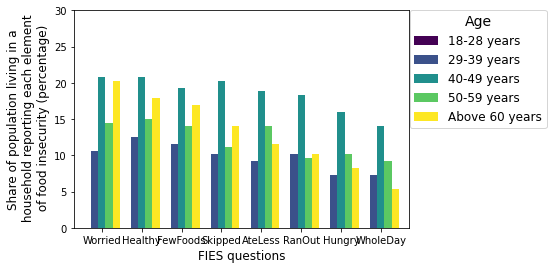

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis

plt.figure(facecolor='white') 

ax = curated_transposed.plot(x='FoodSecurity', 
                             y=list(curated_transposed.columns[1:]), 
                             #height=100,
                             ylim=(0,30),
                             kind="bar",
                             width=0.9,
                             rot = 0,
                             color = Viridis[5])


ax.set_ylabel("Share of population living in a\n household reporting each element\n of food insecurity (percentage)", fontsize = 12)
ax.set_xlabel("FIES questions", fontsize = 12)

plt.rcParams.update({'font.size': 14})

ax.legend(ncol=1, title = "Age", bbox_to_anchor=(1.43, 1.03), fontsize = 12)

plt.rcParams.update({'font.size': 8.8})

#plt.savefig('age_fig4.png',bbox_inches='tight', format='png', dpi=300, edgecolor='none', facecolor=ax.get_facecolor())

#== N/B facecolor=ax.get_facecolor() sets the backgrund as white


## 2. Gender (demographic)

In [47]:
# Our gender data looks like
gender.head()

,Male,Female
0,NaN,2.0
1,1.0,NaN
2,NaN,2.0
3,1.0,NaN
4,NaN,2.0


In [48]:
# Merger the two columns into a single column representation 
temp = col_merger(gender)

#Select the merged data column, rename, and put in a new dataframe df
temp = temp.iloc[:,-1:]
gender_cpy = temp.rename(columns={"Male_Female": "Gender"}) 
gender_cpy.head()

,Gender
0,2
1,1
2,2
3,1
4,2


In [49]:
#Write out gender for regression analysis

gender_cpy.to_csv("./regr/gender_r.csv", sep=',', encoding='utf-8')


In [50]:
# Join both gender and food security dataframes

df_merged = pd.concat([gender_cpy, df], axis=1)
df_merged.head()


,Gender,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,2,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2,2
2,2,1,1,1,1,1,1,2,1
3,1,1,1,1,1,1,1,2,2
4,2,1,1,1,1,1,1,2,1


In [51]:
# Group by both food security and gender
# Extract foodsecure (1) for BOTH genders


def food_sec_binary_yeses(df, gender_cpy, df_merged, gender):
    # df and gender are only used to obtain original column names
    
    """
    Groups by food security variable, sums Age by the groups, puts yeses sums only in new dataframe,
    joins all dataframes generated
    Returns the last grouping execution table and a dictionary of all Yeses retreived from the grouping 
    tables
    """
    
    count = 1
    
    curated_dict = {}
    
    for col_df in df.columns:
        
        temp_dict = {}
        
        for col_age in gender_cpy.columns:
            
            temp1 = df_merged.groupby([col_df, col_age])[col_age].agg(['count']).reset_index() #group by food sec variable and age then count
            
            temp1['outcome1']  = [(int(i) == 1 and int(j) == 1) for i,j in zip(temp1[col_df], temp1[col_age])] # Identify row where both food sec and age variables equal to 1 (Yes)

            temp1['outcome2']  = [(int(i) == 1 and int(j) == 2) for i,j in zip(temp1[col_df], temp1[col_age])] # Identify row where both food sec and age variables equal to 1 (Yes)
            
            #Extract True statements with associated data

            if 'True' in str(set(temp1['outcome1'])):
                
                temp_out = temp1[temp1['outcome1'].astype(str).str.contains('True')].reset_index(drop=True)
                
                temp_dict[gender.columns[0]] = temp_out['count'][0] #assign male
                
                
            if 'True' in str(set(temp1['outcome2'])):
                
                temp_out = temp1[temp1['outcome2'].astype(str).str.contains('True')].reset_index(drop=True)
                
                temp_dict[gender.columns[1]] = temp_out['count'][0] #assign female from column name of gender
                
            else:
                print(col_df, col_age)
                
                print("Yes statements for both variables not detected")
                
                temp_dict[col_age] = int(0)
            
        temp_dict = pd.DataFrame(temp_dict.items()) #store the extracted dictionary in a dataframe
        
        temp_dict = temp_dict.set_index([temp_dict.columns[0]]) #Set 1st column as index
        
        temp_dict.columns = [col_df] # Assign new header
        
        curated_dict['x{0}'.format(count)] = temp_dict #Store the dataframes in the merged dictionary
        
        count += 1
        
    return temp1, curated_dict


In [52]:
# Group by both gender and food security and count
# Select males (1) and worried (1) plus Females (2) and worried (1)
# N/B pass in the gender to obtain both names (male female)
curated_dict = food_sec_binary_yeses(df, gender_cpy, df_merged, gender)
#curated_dict = curated_dict[1]
curated_dict

(   WholeDay  Gender  count  outcome1  outcome2
 0         1       1     36      True     False
 1         1       2     38     False      True
 2         2       1     63     False     False
 3         2       2     70     False     False,
 {'x1':         Worried
  0              
  Male         60
  Female       77,
  'x2':         Healthy
  0              
  Male         66
  Female       71,
  'x3':         FewFoods
  0               
  Male          60
  Female        68,
  'x4':         Skipped
  0              
  Male         55
  Female       60,
  'x5':         AteLess
  0              
  Male         54
  Female       57,
  'x6':         RanOut
  0             
  Male        46
  Female      54,
  'x7':         Hungry
  0             
  Male        42
  Female      44,
  'x8':         WholeDay
  0               
  Male          36
  Female        38})

In [53]:
# Convert the dictionary into a dataframe
                    
curated_df = pd.concat(curated_dict[1].values(), axis=1)
curated_df


,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,,,,,,,,
Male,60,66,60,55,54,46,42,36
Female,77,71,68,60,57,54,44,38


In [54]:
# Calculate percentage representation for each year
curated_perc = curated_df/ 207 * 100
curated_perc
#curated_perc.index.name = 'Age'

# Transpose the matrix
curated_transposed = curated_perc.T
curated_transposed

curated_transposed = curated_transposed.reset_index()  #convert index of the dataframe into a column

#rename the index column
curated_transposed = curated_transposed.rename({'index': 'FoodSecurity'}, axis=1)
curated_transposed


,FoodSecurity,Male,Female
0,Worried,28.985507,37.198068
1,Healthy,31.884058,34.299517
2,FewFoods,28.985507,32.850242
3,Skipped,26.570048,28.985507
4,AteLess,26.086957,27.536232
5,RanOut,22.222222,26.086957
6,Hungry,20.289855,21.256039
7,WholeDay,17.391304,18.357488


In [55]:

curated_transposed.to_excel("Gender_Demog.xlsx", sheet_name='Gender_Demo_vs_food_sec')


In [56]:
### Generate plot

<Figure size 432x288 with 0 Axes>

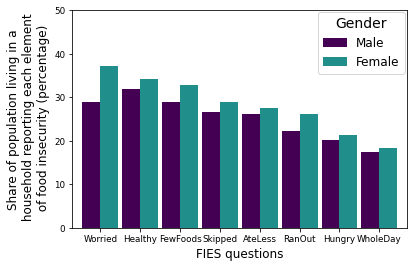

In [36]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#plt.rcParams.update({'axes.facecolor':'white'})

plt.figure(facecolor='white') 

ax = curated_transposed.plot(x='FoodSecurity', 
                             y=list(curated_transposed.columns[1:]), 
                             #height=100,
                             ylim=(0,50),
                             kind="bar",
                             width=0.9,
                             color = Viridis[3],
                             rot = 0)

ax.set_ylabel("Share of population living in a\n household reporting each element\n of food insecurity (percentage)", fontsize = 12)
ax.set_xlabel("FIES questions", fontsize = 12)

plt.rcParams.update({'font.size': 14})

ax.legend(ncol=1, title = "Gender", bbox_to_anchor=(1.01, 1.02), fontsize = 12)

plt.rcParams.update({'font.size': 8.8})

plt.savefig('fig5.png',bbox_inches='tight', format='png', dpi=300, edgecolor='none', facecolor=ax.get_facecolor())

#N/B facecolor=ax.get_facecolor() sets the backgrund as white


### 3. No. of people per HH

In [83]:
hh_numbers.head()


,people_per_HH
0,9
1,5
2,5
3,3
4,5


In [84]:
# Inspect data
hh_numbers.describe()


,people_per_HH
count,207.000000
mean,4.004831
std,1.565705
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,9.000000


##### Generate groups/class from the above data

#### CLASSES
##### 0-5 people
##### 5-10 people


In [85]:
# Categorise the groups with unique decimal numbers (ie, 1, 2, 3, etc)

hh_numbers_cpy = hh_numbers
identifiers = {}
for index, row in hh_numbers_cpy.iterrows():
    if row['people_per_HH'] in list(range(1, 6, 1)):
        identifiers[index] = 1 
        
    elif row['people_per_HH'] in list(range(6, 11, 1)):
        identifiers[index] = 2 
        
    else:
        print(row['people_per_HH'], "Not in range")


# Convert identifiers dictionary to dataframe 
IDs = pd.DataFrame(identifiers.items(), columns=['index', 'Group_identifiers'])
IDs.set_index('index')

#Join with hh_numbers_cpy
hh_numbers_cpy = pd.concat([hh_numbers_cpy, IDs], axis=1).drop(['index'], axis=1)

# Our new dataframe looks like
hh_numbers_cpy


,people_per_HH,Group_identifiers
0,9,2
1,5,1
2,5,1
3,3,1
4,5,1
...,...,...
202,6,2
203,2,1
204,3,1
205,4,1


In [86]:
# Drop the people_per_HH column and only retain Group identifies ror grouping purposes
del hh_numbers_cpy['people_per_HH'] 


In [87]:
#Write out household size for regr
hh_numbers_temp = hh_numbers_cpy.copy()
hh_numbers_temp.columns = ["Household_Size"]
hh_numbers_temp.to_csv("./regr/HH_size_r.csv", sep=',', encoding='utf-8')


,Group_identifiers
0,2
1,1
2,1
3,1
4,1
...,...
202,2
203,1
204,1
205,1


In [88]:
# Join with the food security data

df_merged = pd.concat([hh_numbers_cpy['Group_identifiers'], df], axis=1)
df_merged.head()


,Group_identifiers,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,2,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2,2
2,1,1,1,1,1,1,1,2,1
3,1,1,1,1,1,1,1,2,2
4,1,1,1,1,1,1,1,2,1


In [89]:
#Generate an empty dataframe with the following column names
#0-5 people =< 5
#5-10 people = 5 - 10

columns = ["0-5 people", "5-10 people"]
index = [0]
hh_numbers_groupnames = pd.DataFrame(index=index, columns=columns)
hh_numbers_groupnames


,0-5 people,5-10 people
0,NaN,NaN


In [90]:
# Group by both food security and groups
# Extract foodsecure (1) for BOTH groups: 0-5 people (1)  5-10 people (2)

curated_dict = food_sec_binary_yeses(df, hh_numbers_cpy, df_merged, hh_numbers_groupnames)


In [91]:
# Convert the dictionary into a dataframe
                    
curated_df = pd.concat(curated_dict[1].values(), axis=1)
curated_df


,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,,,,,,,,
0-5 people,117,115,107,96,94,84,72,62
5-10 people,20,22,21,19,17,16,14,12


In [92]:
# Calculate percentage representation for each year
curated_perc = curated_df/ 207 * 100
curated_perc
#curated_perc.index.name = 'Age'

# Transpose the matrix
curated_transposed = curated_perc.T
curated_transposed

curated_transposed = curated_transposed.reset_index()  #convert index of the dataframe into a column

#rename the index column
curated_transposed = curated_transposed.rename({'index': 'FoodSecurity'}, axis=1)
curated_transposed


,FoodSecurity,0-5 people,5-10 people
0,Worried,56.521739,9.661836
1,Healthy,55.555556,10.628019
2,FewFoods,51.690821,10.144928
3,Skipped,46.376812,9.178744
4,AteLess,45.410628,8.212560
5,RanOut,40.579710,7.729469
6,Hungry,34.782609,6.763285
7,WholeDay,29.951691,5.797101


In [46]:

curated_transposed.to_excel("ppl_per_HH_demog.xlsx", sheet_name='ppl_per_HH_vs_food_sec')


<Figure size 432x288 with 0 Axes>

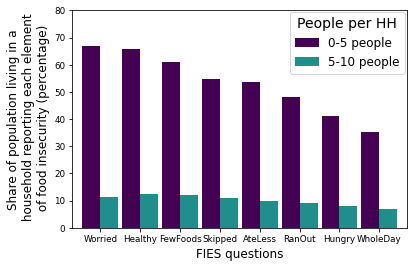

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#plt.rcParams.update({'axes.facecolor':'white'})

plt.figure(facecolor='white') 

ax = curated_transposed.plot(x='FoodSecurity', 
                             y=list(curated_transposed.columns[1:]), 
                             #height=100,
                             ylim=(0,80),
                             kind="bar",
                             width=0.9,
                             color=Viridis[3],
                             rot = 0)


ax.set_ylabel("Share of population living in a\n household reporting each element\n of food insecurity (percentage)", fontsize = 12)
ax.set_xlabel("FIES questions", fontsize = 12)

plt.rcParams.update({'font.size': 14})

ax.legend(ncol=1, title = "People per HH", bbox_to_anchor=(1.01, 1.02), fontsize = 12)

plt.rcParams.update({'font.size': 8.8})

#plt.savefig('fig6.png',bbox_inches='tight', format='png', dpi=300, edgecolor='none', facecolor=ax.get_facecolor())

#N/B facecolor=ax.get_facecolor() sets the backgrund as white


#### 4. Years of schooling

In [93]:
yrs_of_schlng.head()

,0 - 2 years,3 - 4 years,5-6 years,7-8 years,9-10 years,11-12 years,13-14years,15-16years
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
3,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN


In [94]:
#Replace Nan with 2, and any value with 1

yrs_of_schlng_cpy = replacer(yrs_of_schlng)

yrs_of_schlng_cpy = yrs_of_schlng_cpy.drop(columns=['index']).astype(int)   #drop the newly added index column

yrs_of_schlng_cpy.head()

,0 - 2 years,3 - 4 years,5-6 years,7-8 years,9-10 years,11-12 years,13-14years,15-16years
0,2,2,2,2,2,2,2,1
1,2,2,2,2,2,2,2,1
2,2,2,2,2,2,2,2,1
3,2,2,2,2,2,1,2,2
4,2,2,2,2,2,1,2,2


In [96]:
#Slide Years of schooling into one column representing the 5 categories with 1, 2, 3, 4, 5

yrs_of_schlng_temp = yrs_of_schlng_cpy.copy()

count = 1
for i in yrs_of_schlng_temp.columns:
    yrs_of_schlng_temp[i] = yrs_of_schlng_temp[i].replace(2, 0)
    yrs_of_schlng_temp[i] = yrs_of_schlng_temp[i].replace(1, count)
    count += 1

#slide the columns into one
yrs_of_schlng_temp['Schooling_Years']= yrs_of_schlng_temp.sum(axis=1)

#Write out Ages (for regr)
yrs_of_schlng_temp['Schooling_Years'].to_csv("./regr/Schooling_Years_r.csv", sep=',', encoding='utf-8')


In [97]:
# Our merged data looks like

df_merged = pd.concat([yrs_of_schlng_cpy, df], axis=1)
df_merged.head()


,0 - 2 years,3 - 4 years,5-6 years,7-8 years,9-10 years,11-12 years,13-14years,15-16years,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2
2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,1
3,2,2,2,2,2,1,2,2,1,1,1,1,1,1,2,2
4,2,2,2,2,2,1,2,2,1,1,1,1,1,1,2,1


In [98]:
curated_dict = food_sec_yeses(df, yrs_of_schlng_cpy, df_merged)
#curated_dict = curated_dict[1]
curated_dict

Hungry 5-6 years
Yes statements for both variables not detected
WholeDay 5-6 years
Yes statements for both variables not detected


(   WholeDay  15-16years  count  outcome
 0         1           1     21     True
 1         1           2     53    False
 2         2           1     12    False
 3         2           2    121    False,
 {'x1':              Worried
  0                   
  0 - 2 years        9
  3 - 4 years        3
  5-6 years          2
  7-8 years         36
  9-10 years        14
  11-12 years       36
  13-14years         9
  15-16years        28,
  'x2':              Healthy
  0                   
  0 - 2 years        2
  3 - 4 years        5
  5-6 years          8
  7-8 years         40
  9-10 years        11
  11-12 years       33
  13-14years        13
  15-16years        25,
  'x3':              FewFoods
  0                    
  0 - 2 years         2
  3 - 4 years         5
  5-6 years           5
  7-8 years          41
  9-10 years         10
  11-12 years        29
  13-14years         10
  15-16years         26,
  'x4':              Skipped
  0                   
  0 - 2 years        

In [52]:
# Convert the dictionary into a dataframe
# Side_join all the dataframes
                    
curated_df = pd.concat(curated_dict[1].values(), axis=1)
curated_df


,Worried,Healthy,FewFoods,Skipped,AteLess,RanOut,Hungry,WholeDay
0,,,,,,,,
0 - 2 years,9,2,2,4,4,2,2,2
3 - 4 years,3,5,5,3,3,3,1,1
5-6 years,2,8,5,5,4,2,0,0
7-8 years,36,40,41,33,34,30,25,22
9-10 years,14,11,10,8,7,7,7,6
11-12 years,36,33,29,26,27,27,22,18
13-14years,9,13,10,9,8,4,5,4
15-16years,28,25,26,27,24,25,24,21


In [53]:
# Calculate percentage representation for each year
curated_perc = curated_df/ 207 * 100
curated_perc
#curated_perc.index.name = 'Age'

# Transpose the matrix
curated_transposed = curated_perc.T
curated_transposed

curated_transposed = curated_transposed.reset_index()  #convert index of the dataframe into a column

#rename the index column
curated_transposed = curated_transposed.rename({'index': 'FoodSecurity'}, axis=1)
curated_transposed


,FoodSecurity,0 - 2 years,3 - 4 years,5-6 years,7-8 years,9-10 years,11-12 years,13-14years,15-16years
0,Worried,5.142857,1.714286,1.142857,20.571429,8.000000,20.571429,5.142857,16.000000
1,Healthy,1.142857,2.857143,4.571429,22.857143,6.285714,18.857143,7.428571,14.285714
2,FewFoods,1.142857,2.857143,2.857143,23.428571,5.714286,16.571429,5.714286,14.857143
3,Skipped,2.285714,1.714286,2.857143,18.857143,4.571429,14.857143,5.142857,15.428571
4,AteLess,2.285714,1.714286,2.285714,19.428571,4.000000,15.428571,4.571429,13.714286
5,RanOut,1.142857,1.714286,1.142857,17.142857,4.000000,15.428571,2.285714,14.285714
6,Hungry,1.142857,0.571429,0.000000,14.285714,4.000000,12.571429,2.857143,13.714286
7,WholeDay,1.142857,0.571429,0.000000,12.571429,3.428571,10.285714,2.285714,12.000000


In [54]:

curated_transposed.to_excel("yrs_of_scl_demog.xlsx", sheet_name='yrs_of_schl_vs_food_sec')


<Figure size 432x288 with 0 Axes>

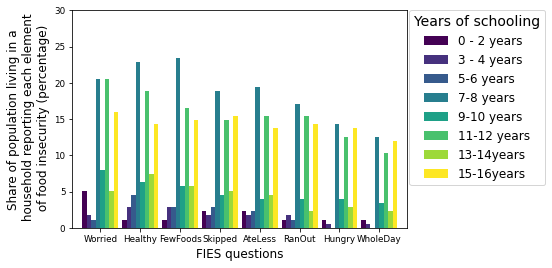

In [56]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#plt.rcParams.update({'axes.facecolor':'white'})

plt.figure(facecolor='white') 

ax = curated_transposed.plot(x='FoodSecurity', 
                             y=list(curated_transposed.columns[1:]), 
                             #height=100,
                             ylim=(0,25),
                             kind="bar",
                             width=0.9,
                             color = Viridis[8],
                             rot = 0)


ax.set_ylabel("Share of population living in a\n household reporting each element\n of food insecurity (percentage)", fontsize = 12)
ax.set_xlabel("FIES questions", fontsize = 12)

plt.rcParams.update({'font.size': 14})

ax.legend(ncol=1, title = "Years of schooling", bbox_to_anchor=(1.43, 1.03), fontsize = 12)

plt.rcParams.update({'font.size': 8.8})

plt.savefig('fig8.png',bbox_inches='tight', format='png', dpi=300, edgecolor='none', facecolor=ax.get_facecolor())
